In [164]:
!pip install yfinance pandas scikit-learn statsmodels

In [188]:
# Loading dependencies and removing warnings
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import itertools
import statsmodels.api as sm
from tqdm import tqdm

# Collecting historical stock price data
symbol = 'WMT'
start_date = '2023-01-01'
end_date = '2023-10-31'
stock_data = yf.download(symbol, start=start_date, end=end_date)['Close']



[*********************100%%**********************]  1 of 1 completed


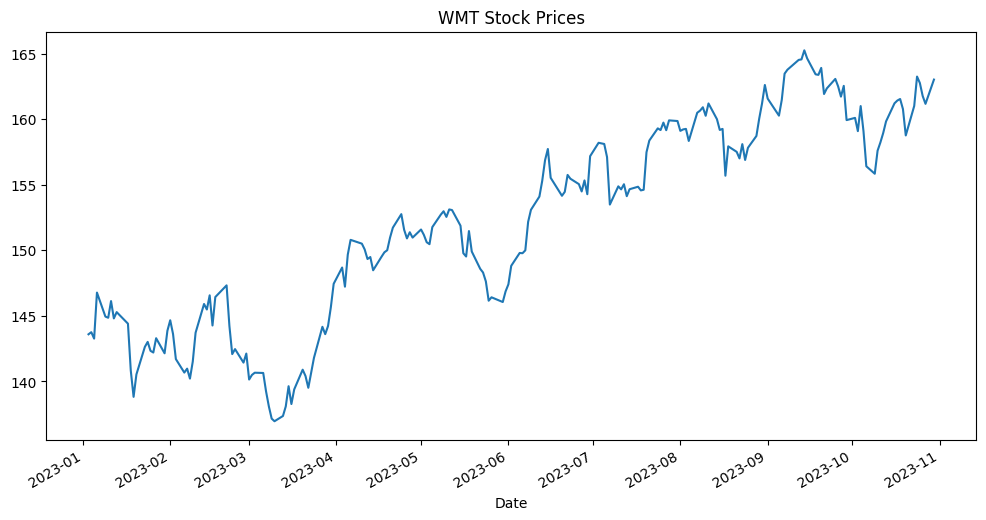

In [189]:
# Visualizing the time series data
stock_data.plot(figsize=(12, 6), title=f'{symbol} Stock Prices')
plt.show()

In [190]:
# Splitting train-test
train_size = int(len(stock_data) * 0.8)
train, test = stock_data[:train_size], stock_data[train_size:]

In [191]:
# training the model and selecting order by performing grid search creating AIC dict
p = d = q = range(0, 5)
pdq = list(itertools.product(p, d, q))
Arima_dict={}
for ord in tqdm(pdq):
    model = sm.tsa.ARIMA(train, order=ord)
    results = model.fit()
    Arima_dict[results.aic]=ord


100%|██████████| 125/125 [01:08<00:00,  1.82it/s]


In [192]:
# Adjusting the order based on data characteristics, taking the order which has lowest AIC
x=min(Arima_dict)
order=Arima_dict[x]
order

(0, 1, 0)

In [193]:
# Re-training ARIMA model on the given lowest AIC order
model = ARIMA(train, order=order)
fit_model = model.fit()

# Making predictions on the test set
predictions = fit_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Evaluating the model on MSE
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 5.003894783268195


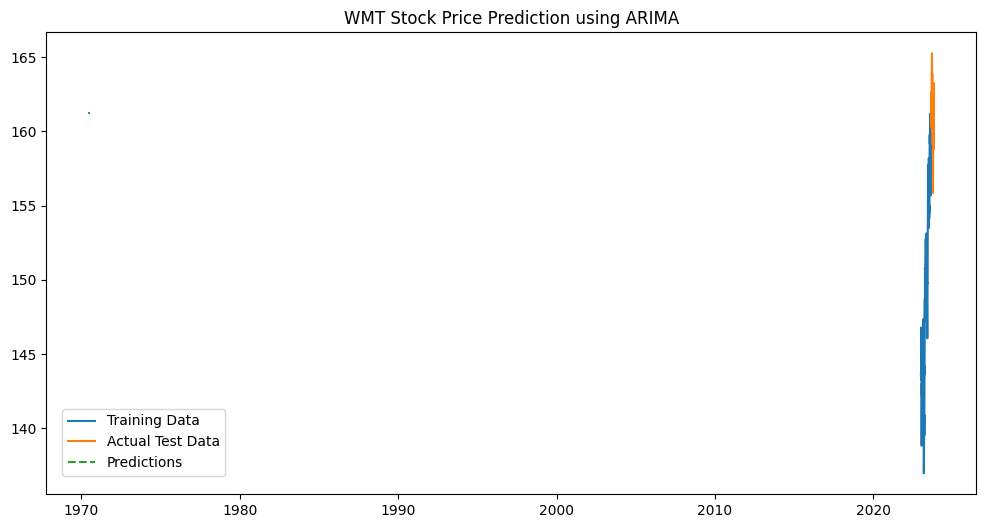

In [201]:
# Step 7: Visualize the predictions
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(predictions, label='Predictions', linestyle='--')
plt.title(f'{symbol} Stock Price Prediction using ARIMA')
plt.legend(fancybox=True, bbox_to_anchor=(0.2, 0.2))
plt.show()
